# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [214]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

## Database Connection

In [215]:
# connection = sqlite3.connect(r"cripto.db")
connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [216]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.001113,0.0,1568887379999,1.0,0.001113,1.568887e+09
1,2,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.000000,0.0,1568887439999,0.0,0.000000,1.568887e+09
2,3,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.012940,0.0,1568887499999,1.0,0.012940,1.568887e+09
3,4,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,1568887559999,0.0,0.000000,1.568888e+09
4,5,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,1568887619999,0.0,0.000000,1.568888e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1694986,1694987,BTCBUSD,17169.55,17170.30,17168.07,17168.72,49.812710,-0.00483413950859579,1670738339999,984.0,25.735070,1.670738e+09
1694987,1694988,BTCBUSD,17168.72,17176.02,17168.10,17175.68,97.289010,0.0405388404027739,1670738399999,1679.0,45.459860,1.670738e+09
1694988,1694989,BTCBUSD,17175.61,17179.13,17175.00,17175.43,83.517770,-0.0010479977130378,1670738459999,1604.0,44.187780,1.670738e+09
1694989,1694990,BTCBUSD,17175.43,17185.00,17175.43,17181.47,112.095470,0.0351665140261459,1670738519999,1935.0,61.720910,1.670738e+09


## Name Columns

In [217]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.001113,0.0,1568887379999,1.0,0.001113,1.568887e+09
1,2,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.000000,0.0,1568887439999,0.0,0.000000,1.568887e+09
2,3,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.012940,0.0,1568887499999,1.0,0.012940,1.568887e+09
3,4,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,1568887559999,0.0,0.000000,1.568888e+09
4,5,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,1568887619999,0.0,0.000000,1.568888e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1694986,1694987,BTCBUSD,17169.55,17170.30,17168.07,17168.72,49.812710,-0.00483413950859579,1670738339999,984.0,25.735070,1.670738e+09
1694987,1694988,BTCBUSD,17168.72,17176.02,17168.10,17175.68,97.289010,0.0405388404027739,1670738399999,1679.0,45.459860,1.670738e+09
1694988,1694989,BTCBUSD,17175.61,17179.13,17175.00,17175.43,83.517770,-0.0010479977130378,1670738459999,1604.0,44.187780,1.670738e+09
1694989,1694990,BTCBUSD,17175.43,17185.00,17175.43,17181.47,112.095470,0.0351665140261459,1670738519999,1935.0,61.720910,1.670738e+09


# Make a Candle plot

In [218]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

# mpf.plot(
#     df_candle.tail(100),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [219]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2019-09-19 10:02:59.999,1,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.001113,0.0,1.0,0.001113,1.568887e+09
2019-09-19 10:03:59.999,2,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.000000,0.0,0.0,0.000000,1.568887e+09
2019-09-19 10:04:59.999,3,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.012940,0.0,1.0,0.012940,1.568887e+09
2019-09-19 10:05:59.999,4,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,0.0,0.000000,1.568888e+09
2019-09-19 10:06:59.999,5,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,0.0,0.000000,1.568888e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11 05:58:59.999,1694987,BTCBUSD,17169.55,17170.30,17168.07,17168.72,49.812710,-0.00483413950859579,984.0,25.735070,1.670738e+09
2022-12-11 05:59:59.999,1694988,BTCBUSD,17168.72,17176.02,17168.10,17175.68,97.289010,0.0405388404027739,1679.0,45.459860,1.670738e+09
2022-12-11 06:00:59.999,1694989,BTCBUSD,17175.61,17179.13,17175.00,17175.43,83.517770,-0.0010479977130378,1604.0,44.187780,1.670738e+09


# Make a Custom Pattern

In [220]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [221]:
# dir(talib)

In [222]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
# df = df.reset_index(drop=True) 
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2019-09-19 10:02:59.999,1,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.001113,0.0,1.0,0.001113,1.568887e+09
2019-09-19 10:03:59.999,2,BTCBUSD,9881.43,9881.43,9881.43,9881.43,0.000000,0.0,0.0,0.000000,1.568887e+09
2019-09-19 10:04:59.999,3,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.012940,0.0,1.0,0.012940,1.568887e+09
2019-09-19 10:05:59.999,4,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,0.0,0.000000,1.568888e+09
2019-09-19 10:06:59.999,5,BTCBUSD,9878.36,9878.36,9878.36,9878.36,0.000000,0.0,0.0,0.000000,1.568888e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11 05:58:59.999,1694987,BTCBUSD,17169.55,17170.30,17168.07,17168.72,49.812710,-0.00483413950859579,984.0,25.735070,1.670738e+09
2022-12-11 05:59:59.999,1694988,BTCBUSD,17168.72,17176.02,17168.10,17175.68,97.289010,0.0405388404027739,1679.0,45.459860,1.670738e+09
2022-12-11 06:00:59.999,1694989,BTCBUSD,17175.61,17179.13,17175.00,17175.43,83.517770,-0.0010479977130378,1604.0,44.187780,1.670738e+09


# Make Dataframe From Binance Data

In [223]:
# from dataframe import GetDataframe
# df = GetDataframe().data_function('BTCBUSD', 1, 100)
# df

## Get Result and All the candlesticks from Ta-Lib

In [224]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[CloseTime
2019-09-19 10:02:59.999    0
2019-09-19 10:03:59.999    0
2019-09-19 10:04:59.999    0
2019-09-19 10:05:59.999    0
2019-09-19 10:06:59.999    0
                          ..
2022-12-11 05:58:59.999    0
2022-12-11 05:59:59.999    0
2022-12-11 06:00:59.999    0
2022-12-11 06:01:59.999    0
2022-12-11 06:02:59.999    0
Length: 1694991, dtype: int32, CloseTime
2019-09-19 10:02:59.999    0
2019-09-19 10:03:59.999    0
2019-09-19 10:04:59.999    0
2019-09-19 10:05:59.999    0
2019-09-19 10:06:59.999    0
                          ..
2022-12-11 05:58:59.999    0
2022-12-11 05:59:59.999    0
2022-12-11 06:00:59.999    0
2022-12-11 06:01:59.999    0
2022-12-11 06:02:59.999    0
Length: 1694991, dtype: int32, CloseTime
2019-09-19 10:02:59.999    0
2019-09-19 10:03:59.999    0
2019-09-19 10:04:59.999    0
2019-09-19 10:05:59.999    0
2019-09-19 10:06:59.999    0
                          ..
2022-12-11 05:58:59.999    0
2022-12-11 05:59:59.999    0
2022-12-11 06:00:59.999    0
2022-12-

## Frame all candle and add sum of the candle result

In [225]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Sum
CloseTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-19 10:02:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-19 10:03:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-19 10:04:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-19 10:05:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-19 10:06:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11 05:58:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,-100
2022-12-11 05:59:59.999,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
2022-12-11 06:00:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,-100,-100,-100,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,-200


## Saferate Numeracdata from dataframe

In [226]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [227]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [228]:
df = df.astype(float)


In [229]:
df = df.add(patterns, fill_value=0)
df.head(60)

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Sum,Trades,VolumeBTC
CloseTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-19 10:02:59.999,0.001113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9881.43,9881.43,9881.43,9881.43,0.0,1.0,0.001113
2019-09-19 10:03:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9881.43,9881.43,9881.43,9881.43,0.0,0.0,0.000000
2019-09-19 10:04:59.999,0.012940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,1.0,0.012940
2019-09-19 10:05:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.0,0.000000
2019-09-19 10:06:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.0,0.000000
2019-09-19 10:07:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.0,0.000000
2019-09-19 10:08:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.0,0.000000
2019-09-19 10:09:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.0,0.000000
2019-09-19 10:10:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Make a plot to see the sum

CloseTime
2019-09-19 10:02:59.999      0
2019-09-19 10:03:59.999      0
2019-09-19 10:04:59.999      0
2019-09-19 10:05:59.999      0
2019-09-19 10:06:59.999      0
                          ... 
2022-12-11 05:58:59.999   -200
2022-12-11 05:59:59.999    200
2022-12-11 06:00:59.999   -400
2022-12-11 06:01:59.999    400
2022-12-11 06:02:59.999   -200
Length: 1694991, dtype: int64


<AxesSubplot:xlabel='CloseTime'>

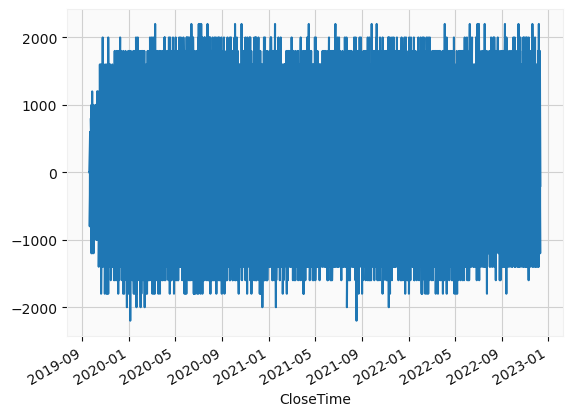

In [230]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [231]:
X = df.drop(['Sum'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC
CloseTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-19 10:02:59.999,0.001113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9881.43,9881.43,9881.43,9881.43,1.0,0.001113
2019-09-19 10:03:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9881.43,9881.43,9881.43,9881.43,0.0,0.000000
2019-09-19 10:04:59.999,0.012940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,1.0,0.012940
2019-09-19 10:05:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.000000
2019-09-19 10:06:59.999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9878.36,9878.36,9878.36,9878.36,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11 05:58:59.999,25.735070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004834,17168.72,17170.30,17168.07,17169.55,984.0,49.812710
2022-12-11 05:59:59.999,45.459860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040539,17175.68,17176.02,17168.10,17168.72,1679.0,97.289010
2022-12-11 06:00:59.999,44.187780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001048,17175.43,17179.13,17175.00

## Y paramiter for feedind Model

In [232]:
y = df['Sum']
y

CloseTime
2019-09-19 10:02:59.999      0.0
2019-09-19 10:03:59.999      0.0
2019-09-19 10:04:59.999      0.0
2019-09-19 10:05:59.999      0.0
2019-09-19 10:06:59.999      0.0
                           ...  
2022-12-11 05:58:59.999   -100.0
2022-12-11 05:59:59.999    100.0
2022-12-11 06:00:59.999   -200.0
2022-12-11 06:01:59.999    200.0
2022-12-11 06:02:59.999   -100.0
Name: Sum, Length: 1694991, dtype: float64

## Model for AI Research

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [234]:
model.fit(X, y)

DecisionTreeClassifier()

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.8)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9930397870785469

## Export Train model

In [236]:
import joblib
joblib.dump(model, "btcbusd_trand_predictor.joblib")

['btcbusd_trand_predictor.joblib']

## Make Prediction With Train Model

In [246]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['VolumeBUSD', 'CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

[0.]


/Users/forhad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [248]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

/Users/forhad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

## All Coulms need for creat a Visual Representation

In [243]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [244]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True     
                    )